In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
comic_con = pd.read_csv('/content/drive/MyDrive/data set/clustering.csv', index_col=0)
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

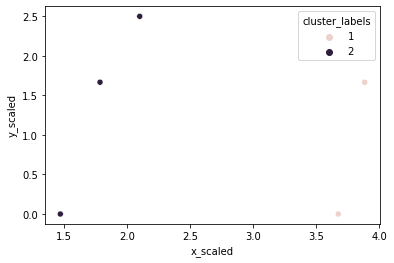

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

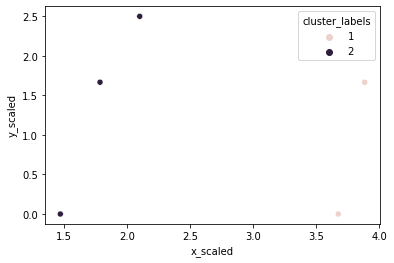

In [ ]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='single', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

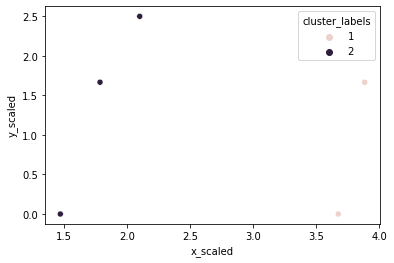

In [ ]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

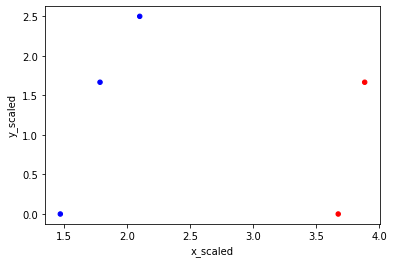

In [ ]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot the scatter plot
comic_con.plot.scatter(x='x_scaled', y='y_scaled', c=comic_con['cluster_labels'].apply(lambda x: colors[x]));

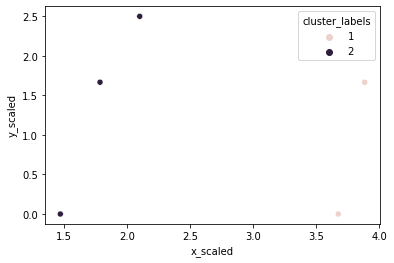

In [ ]:
# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)

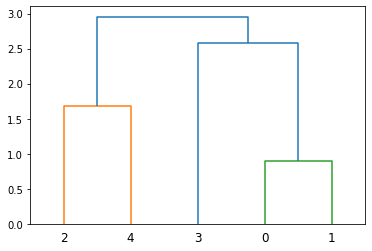

In [ ]:
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

In [ ]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

383 µs ± 9.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
fifa = pd.read_csv('/content/drive/MyDrive/data set/fifa18.csv')
fifa.head()

,Unnamed: 0,sliding_tackle,aggression
0,0,23,63
1,1,26,48
2,2,33,56
3,3,38,78
4,4,11,29


In [ ]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.958458           3.427605
2                            4.112978           4.802752
3                            1.190599           1.785638


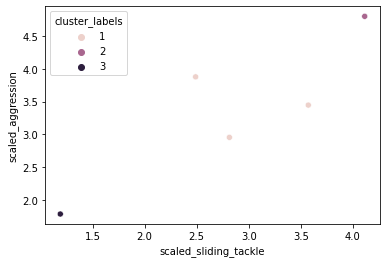

In [ ]:
# Fit the data into a hierarchical cluster
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.savefig('/content/drive/MyDrive/data set/fifa_cluster.png')